**EXPLORATORY DATA ANALYSIS : MOVIE REVENUE DATASET**

Tujuan : Melakukan Exploratory Data Analysis (EDA) terhadap dataset film yang telah diunggah (dataset diambil dari kaggle)

Tools : Python, Pandas, Matplotlib, Seaborn, NumPy

Output : Dataset yang telah dibersihkan serta Visualisasi data.


**UPLOAD** **DATASET**

In [5]:
from google.colab import files
uploaded = files.upload()

Saving movies.csv to movies.csv


**INSTALL LIBRARY**

In [6]:
!pip install pandas matplotlib seaborn numpy

**LOAD DATA**

In [7]:
import pandas as pd
df = pd.read_csv('movies.csv')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


**DATA CLEANING**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [9]:
df.isnull().sum()

,0
name,0
rating,77
genre,0
year,0
released,2
score,3
votes,3
director,0
writer,3
star,1


**EXPLORATORY DATA ANALYSIS**

Basic Statistics

In [10]:
df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


Annual Movie Revenue Trend

In [11]:
df['released'] = pd.to_datetime(df['released'], errors='coerce')
df['Year'] = df['released'].dt.year

<ipython-input-11-0fd8321efef6>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['released'] = pd.to_datetime(df['released'], errors='coerce')


In [12]:
df['gross'] = df['gross'].replace('[\$,]', '', regex=True)
df['gross'] = pd.to_numeric(df['gross'], errors='coerce')

In [13]:
print(df.groupby('year')['gross'].sum())

year
1980    2.483667e+09
1981    2.520065e+09
1982    3.187581e+09
1983    2.750005e+09
1984    3.533092e+09
1985    3.691509e+09
1986    3.647512e+09
1987    4.033434e+09
1988    4.840386e+09
1989    6.087251e+09
1990    6.804236e+09
1991    6.254771e+09
1992    7.334168e+09
1993    8.053959e+09
1994    9.062926e+09
1995    9.448305e+09
1996    9.819528e+09
1997    1.311228e+10
1998    1.117602e+10
1999    1.350964e+10
2000    1.345413e+10
2001    1.561763e+10
2002    1.700344e+10
2003    1.766193e+10
2004    1.872175e+10
2005    1.786661e+10
2006    1.865407e+10
2007    2.038367e+10
2008    2.170216e+10
2009    2.333868e+10
2010    2.310660e+10
2011    2.483769e+10
2012    2.547619e+10
2013    2.599585e+10
2014    2.649148e+10
2015    2.674601e+10
2016    2.893884e+10
2017    2.848525e+10
2018    2.808529e+10
2019    3.033965e+10
2020    2.848299e+09
Name: gross, dtype: float64


In [14]:
import matplotlib.pyplot as plt

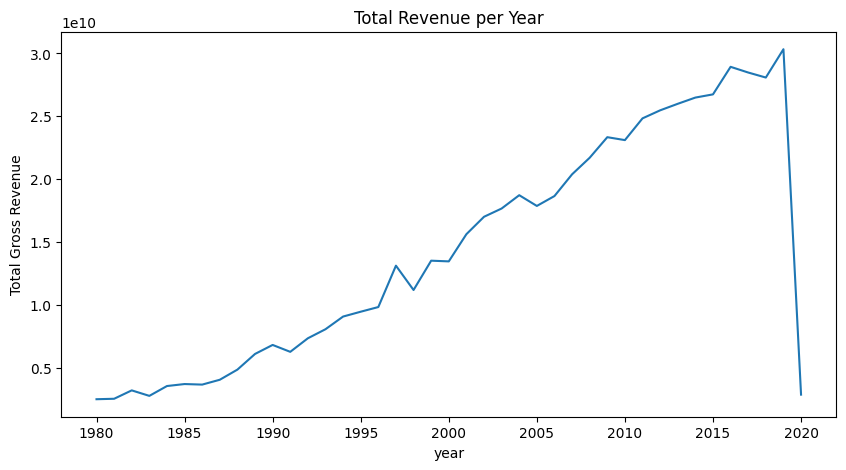

In [15]:
plt.figure(figsize=(10,5))
df.groupby('year')['gross'].sum().plot()
plt.title('Total Revenue per Year')
plt.xlabel('year')
plt.ylabel('Total Gross Revenue')
plt.show()

The Relationship Between Budget and Revenue

In [16]:
import seaborn as sns

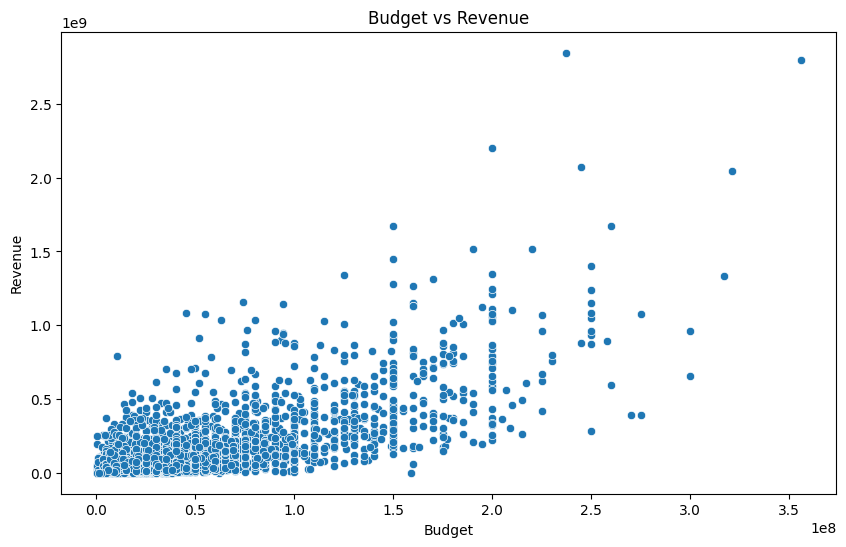

In [18]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='budget', y='gross')
plt.title('Budget vs Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

**VISUALIZING THE MOST COMMON MOVIE GENRES**

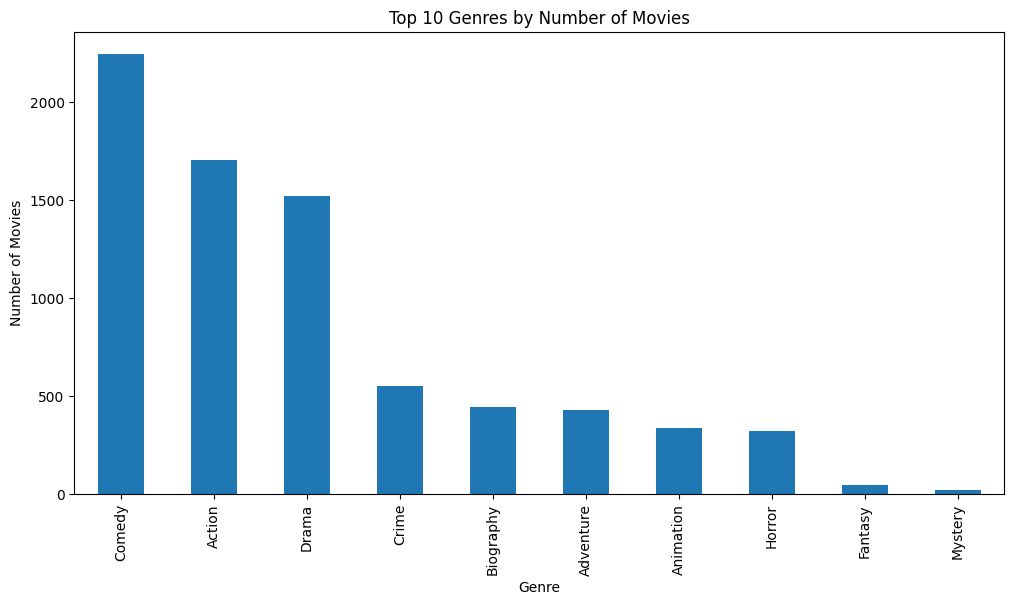

In [21]:
plt.figure(figsize=(12,6))
df['genre'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Genres by Number of Movies')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.show()

Proyek ini melakukan analisis eksploratif terhadap dataset pendapatan film. Analisis mencakup pembersihan data, identifikasi tren pendapatan film per tahun, hubungan antara anggaran dan pendapatan, serta genre film yang paling umum.